# INSTAGRAM: DETECCIÓN DE USUARIOS FALSOS

Instagram es una de las redes sociales mas utilizadas en el mundo. Desde su lanzamiento en 2010 ha crecido considerablemente y actualmente cuenta con mas de 100 millones de usuarios activos. 
Diariamente se crean miles de cuentas por parte de usuarios nuevos que se introducen en la aplicacion, pero producto de su gran uso masivo, es cada vez mas común encontrar cuentas de usuarios falsas creadas para fines específicos como robo de identidad, viralización de sitios maliciosos, entre otros.

Este trabajo tiene como objetivo realizar un análisis exploratorio de datos de un conjunto de datos tomados de los perfiles de usuarios de Instagram, para luego poder predecir cuales de ellos son **reales** y cuales son **falsos**, utilizados como Bots o Spam.

Dataset elegido: https://www.kaggle.com/krpurba/fakeauthentic-user-instagram

<img src="https://miracomohacerlo.com/wp-content/uploads/2019/02/como-ver-a-que-fotos-le-da-like-en-instagram-una-persona-2.jpg" />

# LISTADO DE VARIABLES Y SELECCIÓN

## Descripción de variables

<table>
    <tr>
        <td><strong>Variable</strong></td>
        <td><strong>Definicion</strong></td>
        <td><strong>Es utilizada?</strong></td>
        <td><strong>Entrada/Salida</strong></td>        
        <td><strong>Valor</strong></td>
    </tr>
    <tr>
        <td>pos</td>
        <td>Cantidad de publicaciones totales</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>flw</td>
        <td>Cantidad de seguidores</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>flg</td>
        <td>Cantidad de seguidos</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>bl</td>
        <td>Cantidad de caracteres de la biografía</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>pic</td>
        <td>Contiene imagen de perfil o no</td>
        <td>Si</td>
        <td>Entrada</td>
        <td>0 = NO tiene / 1 = Tiene</td>
    </tr>
    <tr>
        <td>lin</td>
        <td>Contiene URL externa o no</td>
        <td>Si</td>
        <td>Entrada</td>
        <td>0 = NO tiene / 1 = Tiene</td>
    </tr>
    <tr>
        <td>cl</td>
        <td>Promedio de longitud de las publicaciones</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>cz</td>
        <td>Porcentaje de publicaciones con cantidad de caracteres casi nula (<=3) </td>
        <td>Si</td>
        <td>Entrada</td>
        <td>Entre 0.0 y 1.0</td>
    </tr>
    <tr>
        <td>ni</td>
        <td>Porcentaje de publicaciones sin imagenes</td>
        <td>Si</td>
        <td>Entrada</td>
        <td>Entre 0.0 y 1.0</td>
    </tr>
    <tr>
        <td>erl</td>
        <td>Tasa de participación en Likes: Cantidad likes / Cantidad publicaciones / Nro seguidores</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>erc</td>
        <td>Tasa de participación en Comentarios: Cantidad comentarios / Cantidad publicaciones / Nro seguidores </td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>lt</td>
        <td>Porcentaje de publicaciones que tienen ubicación</td>
        <td>Si</td>
        <td>Entrada</td>
        <td>Entre 0.0 y 1.0</td>
    </tr>
    <tr>
        <td>hc</td>
        <td>Promedio de hashtags utilizados en una publicación</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>pr</td>
        <td>Promedio de palabras clave promocionales en hashtags (ej: regrann, contest, repost, giveaway, mention, share, give away, quiz)</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    <tr>
        <td>fo</td>
        <td>Promedio de palabras claves de interacción en hashtags (ej: follow, like, follback)</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>cs</td>
        <td>Similitud de coseno promedio entre todos los pares de dos publicaciones que tiene un usuario</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>pi</td>
        <td>Promedio de tiempo entre publicaciones (en horas)</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>class</td>
        <td>Clase de usuario (usuario real o falso)</td>
        <td>Si</td>
        <td>Salida</td>
        <td>r = real / f = fake</td>
    </tr>
</table>



Las variables de entrada mencionadas en la tabla no requieren transformaciones para ser utilizadas por el modelo predictivo ya que sus valores son numéricos.
Utilizaremos todas las variables del dataset.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_original = pd.read_csv('instagram.csv')

dataset = dataset_original

renamed_columns = {'pos':'post','flw':'followers','flg':'following','bl':'biography_lenght','pic':'profile_picture','lin':'external_url','cl':'post_lenght','cz':'post_lenght_null','ni':'none_image','erl':'engagement_rate_likes','erc':'engagement_rate_comments','lt':'post_location','hc':'hashtags_post','pr':'hashtags_promotional','fo':'hashtags_followers','cs':'cosine_similarity','pi':'interval_post','class':'user_class'}

dataset.rename(columns = renamed_columns, inplace = True)


## Descripción general de los datos

In [3]:
# Dimensiones del dataset
dataset.shape

(65326, 18)

In [4]:
# Ejemplos del dataset
dataset.sample(10)

,post,followers,following,biography_lenght,profile_picture,external_url,post_lenght,post_lenght_null,none_image,engagement_rate_likes,engagement_rate_comments,post_location,hashtags_post,hashtags_promotional,hashtags_followers,cosine_similarity,interval_post,user_class
47142,11,35,55,107,1,1,503,0.000000,0.545,13.250000,2.08,0.455,0.000,0.000,0.091,0.278972,202.780685,r
20373,142,636,953,55,1,0,336,0.111111,0.444,1.810000,0.20,0.000,0.611,0.167,0.000,0.060034,173.564484,f
64108,1,9,79,0,1,0,0,1.000000,0.000,244.440002,11.11,0.000,0.000,0.000,0.000,0.000000,0.000000,r
9362,845,540,1200,147,1,0,60,0.000000,0.278,2.370000,0.22,0.333,0.278,0.000,0.000,0.043721,127.351341,f
42259,8400,132900,4900,110,1,1,120,0.000000,0.500,0.180000,0.00,0.000,2.083,0.000,0.000,0.200337,6.245185,r
58642,43,179,821,0,1,0,85,0.055556,0.111,14.840000,0.74,0.278,0.500,0.000,0.000,0.368933,362.328766,r
13327,1100,570,3100,19,1,1,10,0.944444,0.000,1.390000,0.04,0.056,0.000,0.000,0.000,0.888889,36.087685,f
60843,56,496,2100,0,1,0,100,0.277778,0.111,11.820000,0.77,0.000,0.611,0.000,0.000,0.085970,564.645569,r
45899,10,132,1400,11,1,1,34,0.100000,0.000,26.889999,1.82,0.000,1.000,0.000,0.000,0.069810,336.062042,r
40596,170,294,34,69,1,1,171,0.000000,0.222,7.800000,0.02,0.056,0.222,0.000,0.111,0.138353,126.355713,r


In [5]:
# Datos estadisticos
dataset.describe()

,post,followers,following,biography_lenght,profile_picture,external_url,post_lenght,post_lenght_null,none_image,engagement_rate_likes,engagement_rate_comments,post_location,hashtags_post,hashtags_promotional,hashtags_followers,cosine_similarity,interval_post
count,65326.000000,6.532600e+04,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000
mean,176.571227,1.183077e+03,2310.519211,57.497061,0.951765,0.281925,136.520344,0.250012,0.193229,19.146641,1.139421,0.208877,0.507796,0.032745,0.052837,0.299098,496.475193
std,723.470655,2.170802e+04,2592.096104,64.129260,0.214264,0.449940,215.714486,0.337891,0.252939,121.047570,5.810627,0.300362,1.156921,0.220987,0.519058,0.349604,944.905389
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.230000e+02,394.000000,0.000000,1.000000,0.000000,8.000000,0.000000,0.000000,2.730000,0.080000,0.000000,0.000000,0.000000,0.000000,0.033327,24.571458
50%,30.000000,3.380000e+02,995.000000,32.000000,1.000000,0.000000,46.000000,0.055556,0.059000,9.450000,0.440000,0.000000,0.077000,0.000000,0.000000,0.136915,183.227943
75%,124.000000,8.170000e+02,3600.000000,110.000000,1.000000,1.000000,170.000000,0.444444,0.333000,18.680000,1.040000,0.333000,0.611000,0.000000,0.000000,0.456342,580.771927
max,76200.000000,3.900000e+06,8800.000000,555.000000,1.000000,1.000000,3644.000000,1.000000,1.000000,26650.000000,1009.090027,1.000000,30.000000,20.000000,58.000000,1.000000,26786.134766


In [6]:
# Datos nulos por columna
dataset.isnull().sum()

post                        0
followers                   0
following                   0
biography_lenght            0
profile_picture             0
external_url                0
post_lenght                 0
post_lenght_null            0
none_image                  0
engagement_rate_likes       0
engagement_rate_comments    0
post_location               0
hashtags_post               0
hashtags_promotional        0
hashtags_followers          0
cosine_similarity           0
interval_post               0
user_class                  0
dtype: int64

# ANÁLISIS DETALLADO DE VARIABLES

## Descripción de variable de salida

Text(0.5, 1.0, 'Clases de usuarios')

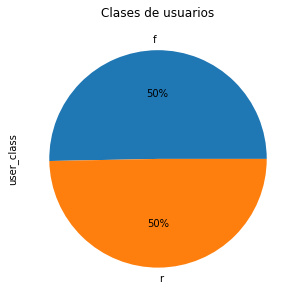

In [7]:
# Balanceo de datos

dataset.user_class.value_counts().plot.pie(autopct='%1.0f%%', figsize=(5,5)).set_title('Clases de usuarios')


Tal como se visualiza en el gráfico anterior, los datos de la **variable de salida** se encuentran **balanceados** ya que dentro del dataset existe la misma proporción de usuarios reales que de falsos. Al estar balanceados los datos no tendremos consecuencias para predecir la clasificación de nuevos usuarios. 

## Descripción de variables de entrada

### Variable: profile_picture

La variable **profile_picture** describe si una cuenta posee o no foto de perfil. 

Los valores posibles son: **0** (si no posee foto de perfil) y **1** (si posee foto de perfil)

Text(0.5, 1.0, 'Usuarios que poseen o no imagen de perfil')

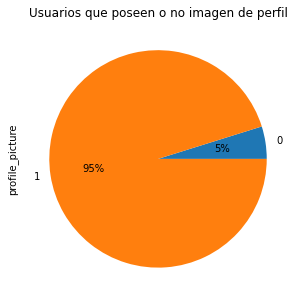

In [4]:
dataset.profile_picture.value_counts().sort_index().plot.pie(autopct='%1.0f%%', figsize=(5,5)).set_title('Usuarios que poseen o no imagen de perfil')

Dentro del dataset observamos que la cantidad de usuarios que **poseen** foto de perfil es considerablemente **mayor** que la cantidad de usuarios que **no poseen** foto de perfil.

#### Comportamiento con la variable de salida

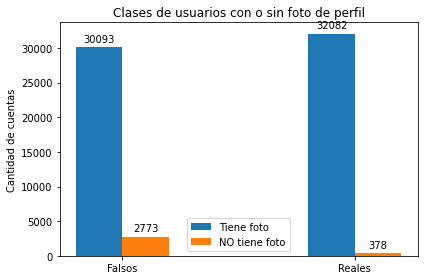

In [9]:
labels = ['Falsos','Reales']
con_foto = [len(dataset[(dataset.profile_picture == 1) & (dataset.user_class == 'f')]),
          len(dataset[(dataset.profile_picture == 1) & (dataset.user_class == 'r')])]

sin_foto = [len(dataset[(dataset.profile_picture == 0) & (dataset.user_class == 'f')]),
            len(dataset[(dataset.profile_picture == 0) & (dataset.user_class == 'r')])]

x = np.arange(len(labels))  
width = 0.20  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, con_foto, width, label='Tiene foto')
rects2 = ax.bar(x + width/2, sin_foto, width, label='NO tiene foto')

ax.set_ylabel('Cantidad de cuentas')
ax.set_title('Clases de usuarios con o sin foto de perfil')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Tanto para usuarios falsos como reales, la mayoría de cuentas poseen foto de perfil. Sin embargo se puede notar que la **cantidad de usuarios falsos sin foto de perfil** es **mayor** que la **cantidad de usuarios reales sin foto de perfil.** 

### Variable: external_url 


La variable **external_url** describe si una cuenta posee o no URL externa.

Los valores posibles son: **0** (si no posee URL externa) y **1** (si posee URL externa)


Text(0.5, 1.0, 'Usuarios que poseen o no URL externa')

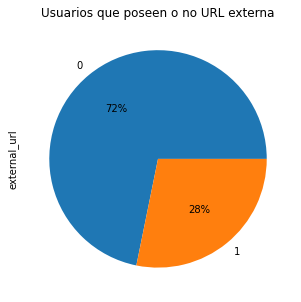

In [5]:
dataset.external_url.value_counts().sort_index().plot.pie(autopct='%1.0f%%', figsize=(5,5)).set_title('Usuarios que poseen o no URL externa')

Dentro del dataset observamos que la gran mayoria de cuentas **no tienen** URL externa.

#### Comportamiento con la variable de salida

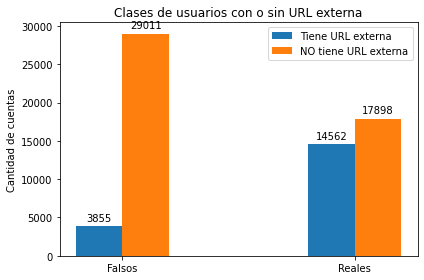

In [11]:
labels = ['Falsos','Reales']
con_foto = [len(dataset[(dataset.external_url == 1) & (dataset.user_class == 'f')]),
          len(dataset[(dataset.external_url == 1) & (dataset.user_class == 'r')])]

sin_foto = [len(dataset[(dataset.external_url == 0) & (dataset.user_class == 'f')]),
            len(dataset[(dataset.external_url == 0) & (dataset.user_class == 'r')])]

x = np.arange(len(labels))  
width = 0.20  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, con_foto, width, label='Tiene URL externa')
rects2 = ax.bar(x + width/2, sin_foto, width, label='NO tiene URL externa')

ax.set_ylabel('Cantidad de cuentas')
ax.set_title('Clases de usuarios con o sin URL externa')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Tanto para usuarios falsos como reales, la mayoría de cuentas **no poseen** URL externa. Sin embargo se puede notar que la cantidad de usuarios falsos sin URL externa es mayor que la cantidad de usuarios reales sin URL externa.

### Variable: post_location 


La variable **post_location** describe el porcentaje de publicaciones que tienen ubicación.

Los valores posibles van desde **0.0** a **1.0**


Text(0.5, 1.0, 'Usuarios que nunca colocaron ubicación en publicaciones')

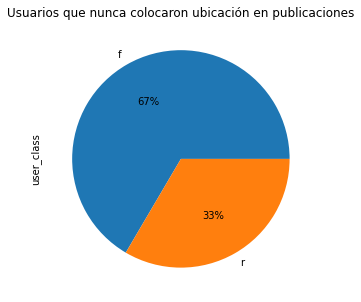

In [10]:
dataset[dataset.post_location==0.0].user_class.value_counts().sort_index().plot.pie(autopct='%1.0f%%', figsize=(5,5)).set_title('Usuarios que nunca colocaron ubicación en publicaciones')

Dentro del dataset observamos que la cantidad de usuarios que nunca colocaron la ubicación en sus publicaciones es mayor para los usuarios falsos que para los reales, es decir que los datos nos indican que **es mas común que los usuarios falsos no coloquen datos de ubicación**. 

#### Comportamiento con la variable de salida

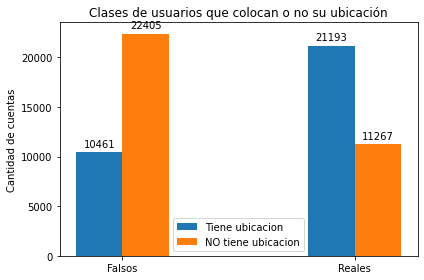

In [27]:
labels = ['Falsos','Reales']
con_ubicacion = [len(dataset[(dataset.post_location > 0.0) & (dataset.user_class == 'f')]),
                len(dataset[(dataset.post_location > 0.0) & (dataset.user_class == 'r')])]

sin_ubicacion = [len(dataset[(dataset.post_location == 0.0) & (dataset.user_class == 'f')]),
                len(dataset[(dataset.post_location == 0.0) & (dataset.user_class == 'r')])]

x = np.arange(len(labels))  
width = 0.20  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, con_ubicacion, width, label='Tiene ubicacion')
rects2 = ax.bar(x + width/2, sin_ubicacion, width, label='NO tiene ubicacion')

ax.set_ylabel('Cantidad de cuentas')
ax.set_title('Clases de usuarios que colocan o no su ubicación')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Entre los usuarios que no colocan ubicación en las publicaciones es mayor para usuarios falsos que para reales.

### Variable: hashtags_post


La variable **hashtags_post** representa el promedio de hashtags utilizados en una publicación.

Text(0.5, 1.0, 'Usuarios con publicaciones con hashtags')

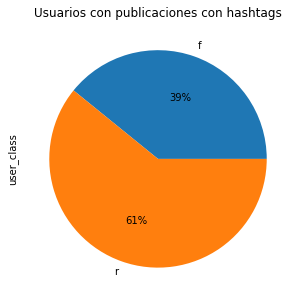

In [12]:
dataset[dataset.hashtags_post>0.0].user_class.value_counts().sort_index().plot.pie(autopct='%1.0f%%', figsize=(5,5)).set_title('Usuarios con publicaciones con hashtags')

Dentro del dataset observamos que los **usuarios reales** poseen un **mayor uso de hashtags** que los usuarios falsos.

#### Comportamiento con la variable de salida

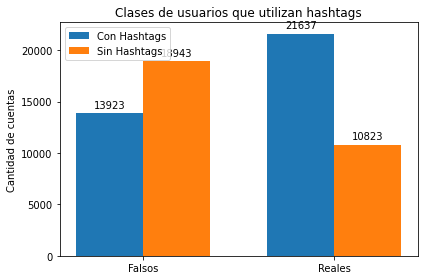

In [51]:
labels = ['Falsos','Reales']
con_hashtags_p = [len(dataset[(dataset.hashtags_post > 0.0) & (dataset.user_class == 'f')]),
                len(dataset[(dataset.hashtags_post > 0.0) & (dataset.user_class == 'r')])]

sin_hashtags_p = [len(dataset[(dataset.hashtags_post == 0.0) & (dataset.user_class == 'f')]),
                len(dataset[(dataset.hashtags_post == 0.0) & (dataset.user_class == 'r')])]

x = np.arange(len(labels))  
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, con_hashtags_p, width, label='Con Hashtags')
rects2 = ax.bar(x + width/2, sin_hashtags_p, width, label='Sin Hashtags')

ax.set_ylabel('Cantidad de cuentas')
ax.set_title('Clases de usuarios que utilizan hashtags')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Como observamos en el gráfico los usuarios reales utilizan mas hashtags que los falsos.

### Variable: interval_post


La variable **interval_post** representa el promedio de tiempo ocurrido entre publicaciones (en horas).

Text(0.5, 1.0, 'Usuarios que en promedio realizan publicaciones en el mismo día')

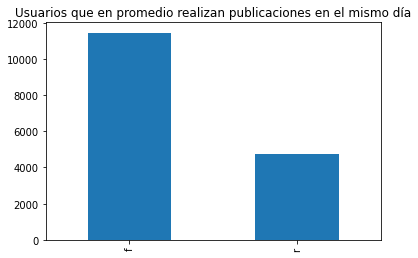

In [24]:
dataset[dataset.interval_post<24.0].user_class.value_counts().sort_index().plot.bar().set_title('Usuarios que en promedio realizan publicaciones en el mismo día')

Dentro del dataset observamos que la cantidad de usuarios que realizan **publicaciones dentro del mismo día es mayor para usuarios falsos que para reales**.

#### Comportamiento con la variable de salida

/home/migue/Escritorio/MachineLearning/virtualenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/migue/Escritorio/MachineLearning/virtualenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/migue/Escritorio/MachineLearning/virtualenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Mas de una semana'}>

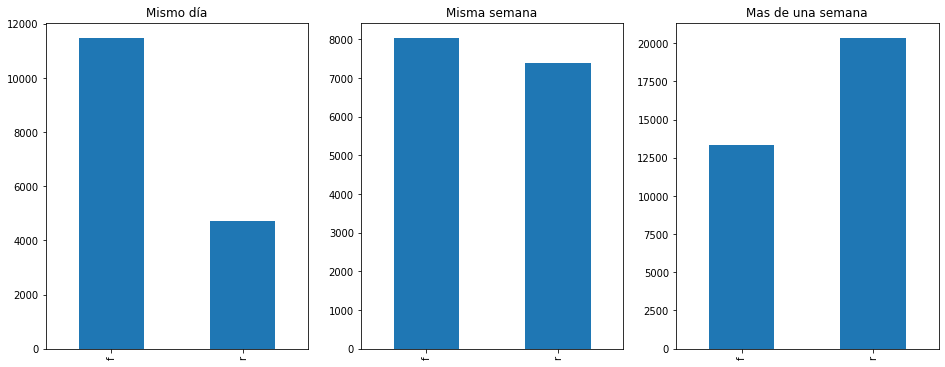

In [49]:
f,ax=plt.subplots(1,3,figsize=(16,6))

# si interval_post es < 24 quiere decir que en promedio sube publicaciones en el mismo día.
ax[0].set_title('Mismo día')
dataset[dataset.interval_post<24.0].user_class.value_counts().sort_index().plot.bar(ax=ax[0])

# si interval_post es > 24 y < 168 quiere decir que en promedio sube publicaciones en la misma semana.
ax[1].set_title('Misma semana')
dataset[(dataset.interval_post>= 24.0) & (dataset.interval_post<= 168.0)].user_class.value_counts().sort_index().plot.bar(ax=ax[1])

# si interval_post es > 168 quiere decir que en promedio sube publicaciones en mas de una semana.
ax[2].set_title('Mas de una semana')
dataset[dataset.interval_post> 168].user_class.value_counts().sort_index().plot.bar(ax=ax[2])

Podemos observar que los usuarios **falsos** tienen mayor promedio de publicaciones cuando el intervalo de tiempo entre ellas es **menor a una semana**; al contrario de los usuarios **reales** que el promedio de publicaciones es de **mas de una semana**.

# Correlación de variables

In [53]:
dataset["user_class"] = dataset.user_class.replace(['f','r'], [0, 1])
dataset.corr()

,post,followers,following,biography_lenght,profile_picture,external_url,post_lenght,post_lenght_null,none_image,engagement_rate_likes,engagement_rate_comments,post_location,hashtags_post,hashtags_promotional,hashtags_followers,cosine_similarity,interval_post,user_class
post,1.000000,0.135049,0.061212,0.160135,0.051938,0.169530,0.184861,-0.079381,0.077786,-0.030385,-0.038688,0.029853,0.014968,0.020762,-0.010636,-0.015924,-0.085687,0.020768
followers,0.135049,1.000000,0.007297,0.040520,0.010087,0.051048,0.033444,-0.022630,0.025235,-0.006179,-0.008265,0.012076,0.005407,-0.001551,-0.001494,-0.012064,-0.013127,0.021876
following,0.061212,0.007297,1.000000,0.009365,-0.129441,-0.033437,-0.063118,0.166987,-0.077394,0.023733,-0.024267,-0.115437,-0.042087,-0.046642,0.022982,0.229080,-0.084763,-0.396000
biography_lenght,0.160135,0.040520,0.009365,1.000000,0.166268,0.471750,0.350113,-0.272344,0.141115,-0.039509,-0.060438,0.218246,0.160880,-0.027192,0.017702,-0.135914,-0.111549,0.254126
profile_picture,0.051938,0.010087,-0.129441,0.166268,1.000000,0.124227,0.119568,0.062627,0.127787,-0.019804,-0.021231,0.127461,0.062906,0.022608,0.001248,-0.264526,0.084405,0.169713
external_url,0.169530,0.051048,-0.033437,0.471750,0.124227,1.000000,0.300796,-0.239548,0.134877,-0.045439,-0.067379,0.196867,0.093820,-0.039453,-0.009535,-0.096147,-0.096717,0.368177
post_lenght,0.184861,0.033444,-0.063118,0.350113,0.119568,0.300796,1.000000,-0.353722,0.109310,-0.039938,-0.050617,0.084010,0.185383,0.207818,0.055534,-0.089811,-0.112708,0.072733
post_lenght_null,-0.079381,-0.022630,0.166987,-0.272344,0.062627,-0.239548,-0.353722,1.000000,-0.125527,0.078084,0.085500,-0.205243,-0.218162,-0.060874,-0.045788,0.320240,0.063316,-0.204169
none_image,0.077786,0.025235,-0.077394,0.141115,0.127787,0.134877,0.109310,-0.125527,1.000000,-0.024201,-0.033442,0.219128,0.048066,-0.023015,-0.007850,-0.240686,0.000521,0.161461
engagement_rate_likes,-0.030385,-0.006179,0.023733,-0.039509,-0.019804,-0.045439,-0.039938,0.078084,-0.024201,1.000000,0.443567,-0.014675,0.023996,-0.004538,0.034061,-0.031888,0.000753,-0.010022


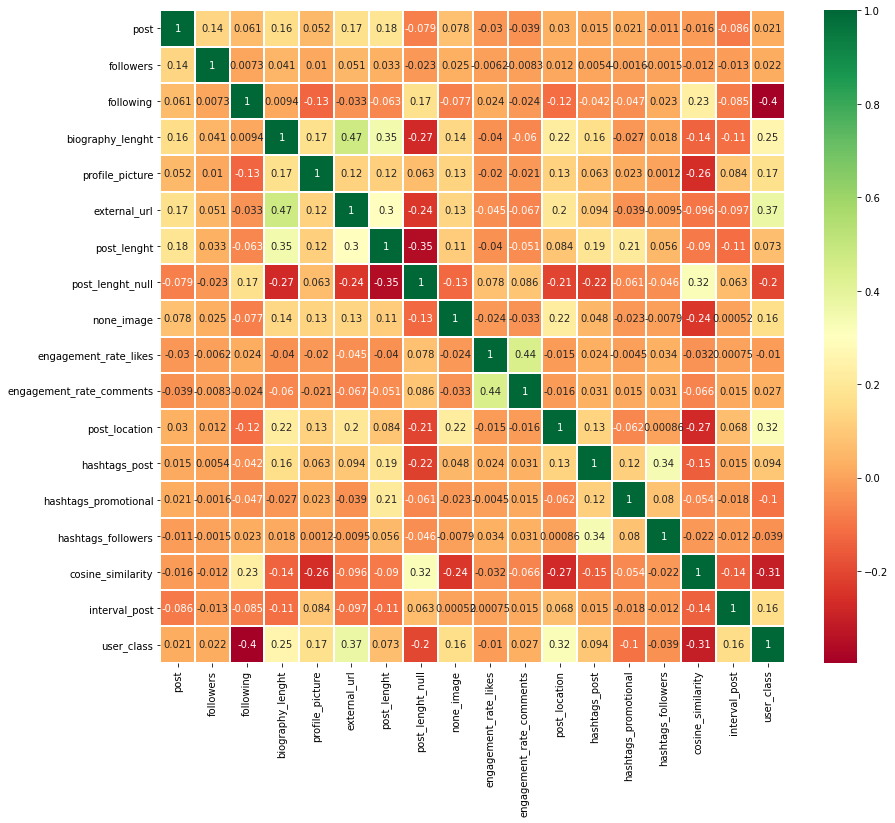

In [54]:
dataset["user_class"] = dataset.user_class.replace(['f','r'], [0, 1])
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(14,12)
plt.show()

### Correlaciones con la variable de salida
Tal como podemos observar en la matriz de correlación tenemos las siguientes correlaciones positivas entre la variable target (user_class) y ciertas variables de entrada:
1) **user_class** y **external_url**: Poseen una correlación positiva leve de 0.37 que indica que al aumentar el valor de la variable external_url también aumenta el valor de la variable target.

2) **user_class** y **post_location**: Poseen una correlación positiva leve de 0.32 que indica que al aumentar el valor de la variable post_location también aumenta el valor de la variable target. Esto tiene sentido ya que a medida que el porcentaje de publicaciones con ubicación crece es mas probable que user_class sea 1 (usuario real).

Por otro lado, también observamos correlaciones negativas entre la variable target (user_class) y ciertas variables de entrada:
1) **user_class** y **following**: Poseen una correlación negativa fuerte que indica que al aumentar el valor de la variable following el valor de user_class disminuye. Esto tiene sentido ya que a medida que aumenta la cantidad de seguidos de una cuenta de usuario es mas probable que la misma corresponda a una cuenta de usuario falsa.

2) **user_class** y **post_lenght_null**: Poseen una correlación negativa fuerte que indica que al aumentar el valor de la variable post_lenght_null el valor de user_class disminuye. Esto tiene sentido ya que es mas común que cuentas de usuarios falsas tengan mas cantidad de publicaciones con pocos caracteres.

### Correlaciones entre variables de entrada
A simple vista observamos que la variable **post_lenght**(promedio de caracteres de longitud de las publicaciones) posee una correlación negativa con la variable **post_length_null** (porcentaje de publicaciones con cantidad de caracteres casi nula) donde al aumentar una la otra disminuye. Esto tiene sentido ya que si una publicación tiene muchos caracteres, claramente no posee una longitud casi nula. 

Además, podemos mencionar que dentro de nuestro dataset las variables que estan mas correlacionadas positivamente son **biography_lengh** y **external_url** y esto nos parece correcto ya que la variable biography_lengh indica la cantidad de caracteres de la biografía y la variable external_url indica si el perfil posee url externa o no en su biografia, por lo que tiene sentido que si la variable external_url aumenta tambien lo haga la variable biography_lenght.